In [ ]:
# import bibliotek

from google.colab.patches import cv2_imshow
import cv2

cv2.__version__

'4.8.0'

In [ ]:
# Wczytanie obrazu
img = cv2.imread(filename='view.jpg')
img

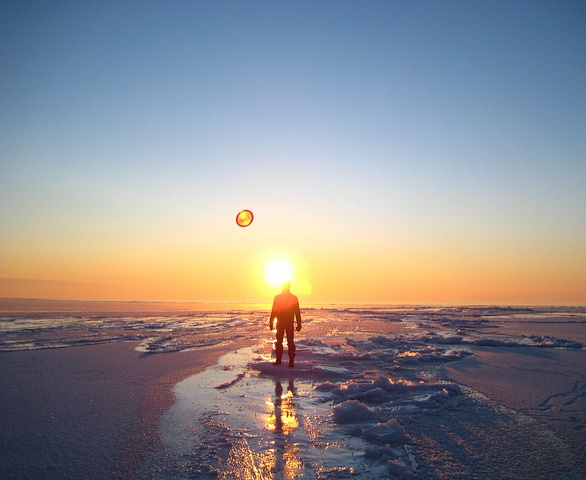

In [ ]:
cv2_imshow(img)

In [ ]:
img.shape

(480, 586, 3)

In [ ]:
# Zapisanie obrazu do pliku
cv2.imwrite(filename='view-copy.png', img=img)

True

In [ ]:
# Wczytanie obrazu w odcieni szarości

img = cv2.imread(filename='view.jpg', flags=cv2.IMREAD_GRAYSCALE)
img


array([[74, 71, 79, ..., 78, 82, 81],
       [77, 78, 76, ..., 81, 81, 79],
       [79, 79, 75, ..., 81, 78, 78],
       ...,
       [41, 39, 34, ..., 45, 42, 37],
       [37, 37, 38, ..., 37, 40, 54],
       [39, 40, 43, ..., 50, 53, 47]], dtype=uint8)

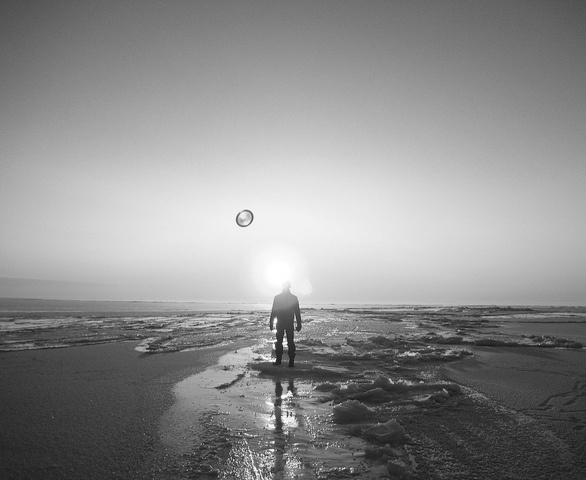

In [ ]:
cv2_imshow(img)

In [ ]:
img.shape

(480, 586)

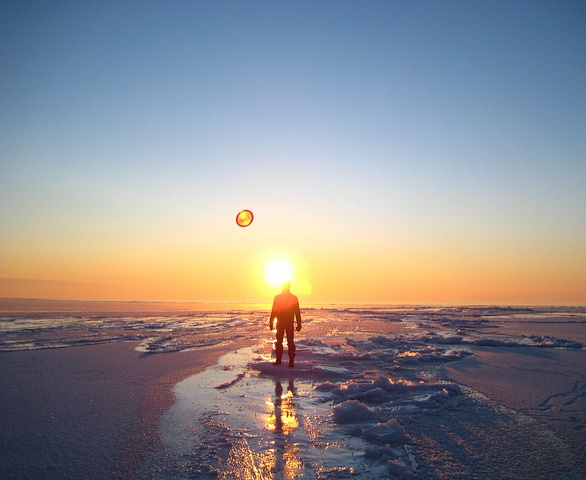

In [ ]:
# Wycinanie framgentów obrazu
img = cv2.imread(filename='view.jpg')
cv2_imshow(img)

(200, 200, 3)


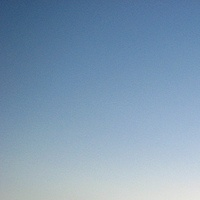

In [ ]:
# Wycinam z obrazu rogi

left_top_square = img[:200, :200]
print(left_top_square.shape)
cv2_imshow(left_top_square)

(200, 200, 3)


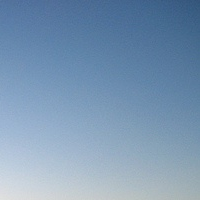

In [ ]:
right_top_square = img[:200, -200:]
print(right_top_square.shape)
cv2_imshow(right_top_square)

(200, 200, 3)


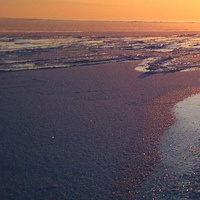

In [ ]:
left_bottom_square = img [-200:, :200]
print(left_bottom_square.shape)
cv2_imshow(left_bottom_square)

(200, 200, 3)


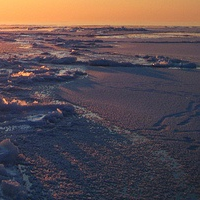

In [ ]:
right_bottom_square = img [-200:, -200:]
print(right_bottom_square.shape)
cv2_imshow(right_bottom_square)

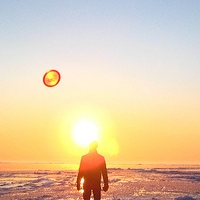

In [ ]:
height, width, _ = img.shape

h0 = height // 2 - 100
h1 = height // 2 + 100
w0 = width // 2 - 100
w1 = width // 2 + 100

middle = img[h0:h1, w0:w1]
cv2_imshow(middle)

In [ ]:
# Zmiana rozmiaru obrazu
import imutils
imutils.__version__

'0.5.4'

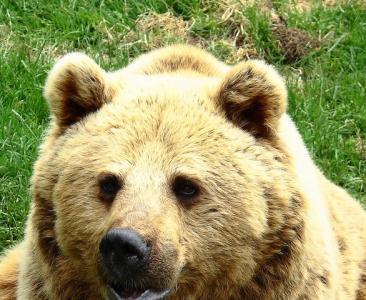

In [ ]:
img = cv2.imread('bear.jpg')
img_resized = imutils.resize(image=img, height=300)
cv2_imshow(img_resized)

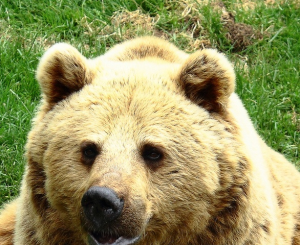

In [ ]:
img_resized = imutils.resize(image=img, width=300)
cv2_imshow(img_resized)

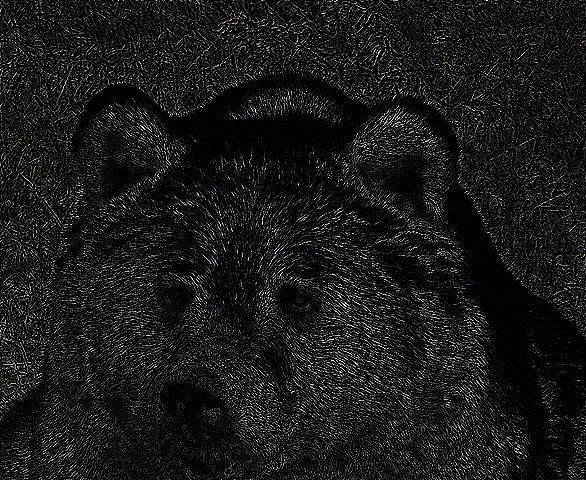

In [ ]:
# Detekcja krawędzi

cv2_imshow(cv2.Laplacian(src=img, ddepth=cv2.CV_64F))

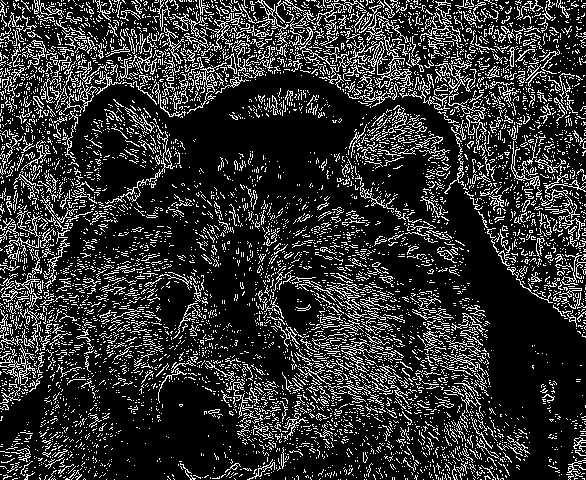

In [ ]:
cv2_imshow(cv2.Canny(image=img, threshold1=200, threshold2=200))

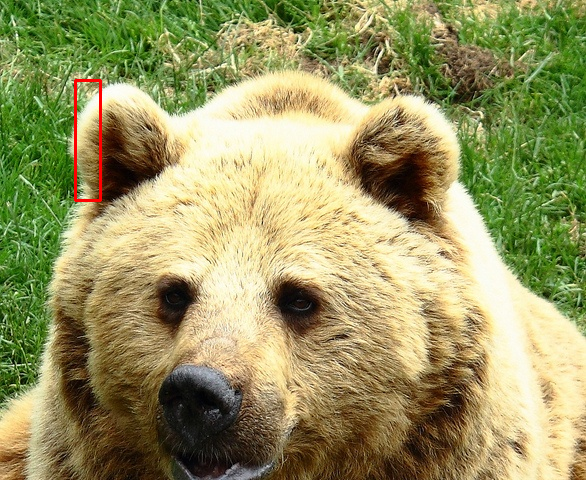

In [ ]:
# Rysowanie po obrazie

cv2_imshow(cv2.rectangle(img=img.copy(), pt1=(75, 80), pt2=(100,200), color=(0, 0, 255), thickness=2))

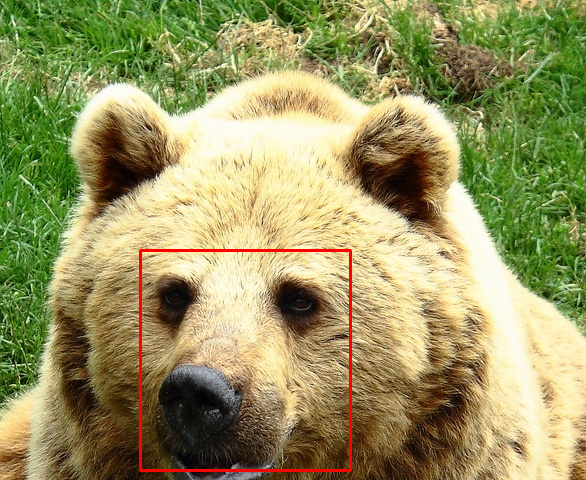

In [ ]:
cv2_imshow(cv2.rectangle(img=img.copy(), pt1=(140, 250), pt2=(350,470), color=(0, 0, 255), thickness=2))

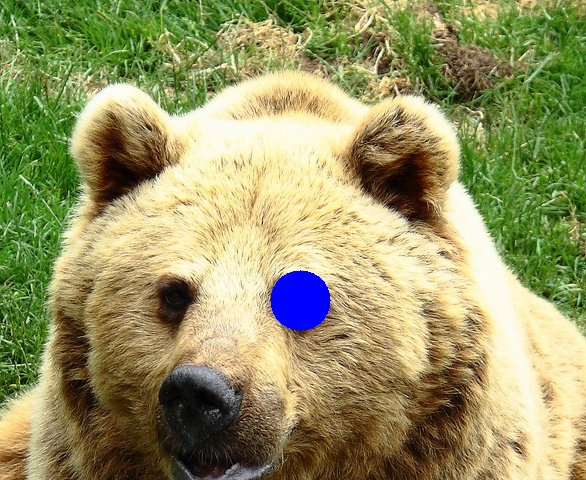

In [ ]:
cv2_imshow(cv2.circle(img=img.copy(), center=(300, 300), radius=30, color=(255, 0, 0), thickness=-1))

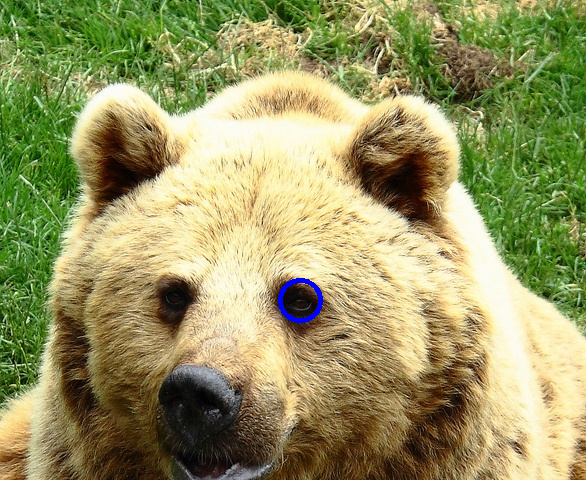

In [ ]:
cv2_imshow(cv2.circle(img=img.copy(), center=(300, 300), radius=20, color=(255, 0, 0), thickness=3))

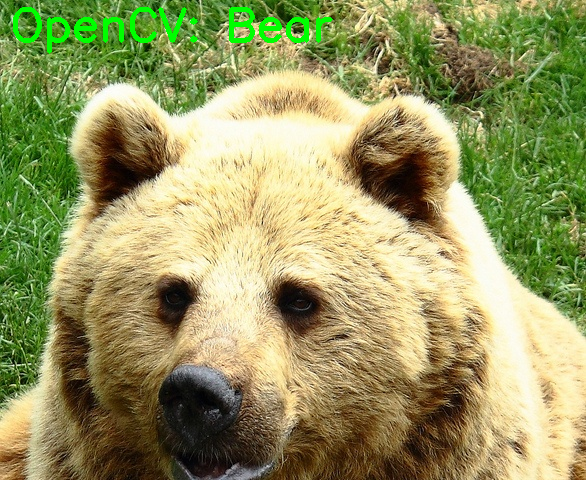

In [ ]:
cv2_imshow(cv2.putText(img=img.copy(), text='OpenCV: Bear', org=(10, 40),
                       fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1.5,
                       color=(0,255,0), thickness=4))

# DETEKCJA PROSTOKĄTÓW

In [29]:
# Import bibliotek

import cv2
from google.colab.patches import cv2_imshow
import imutils

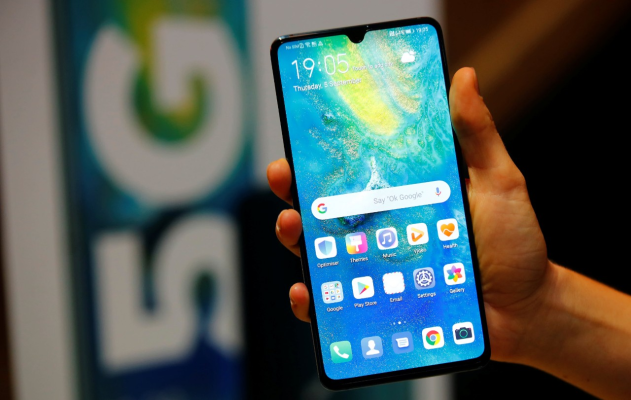

In [30]:
# Wczytanie obrazu

image = cv2.imread('phone.jpg')
image = imutils.resize(image, height=400)
cv2_imshow(image)

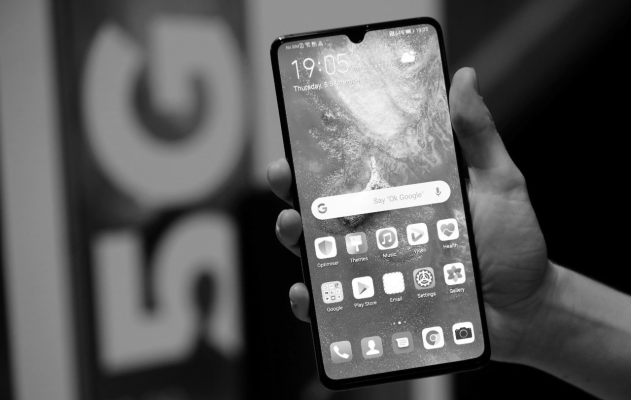

In [31]:
# Konwersja do odcieni szarości
gray_image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

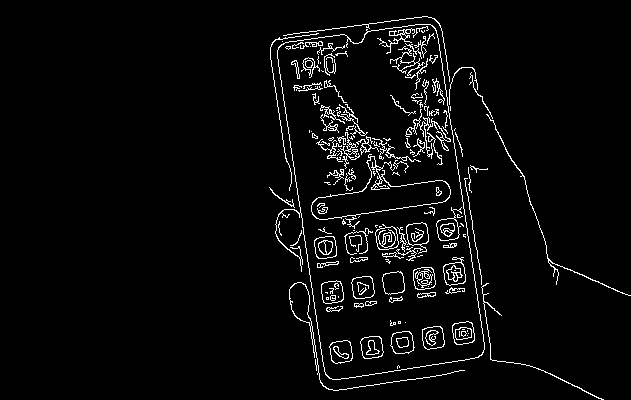

In [32]:
# Detekcja krawędzi
edges1 = cv2.Canny(image=gray_image, threshold1=70, threshold2=200)
cv2_imshow(edges1)

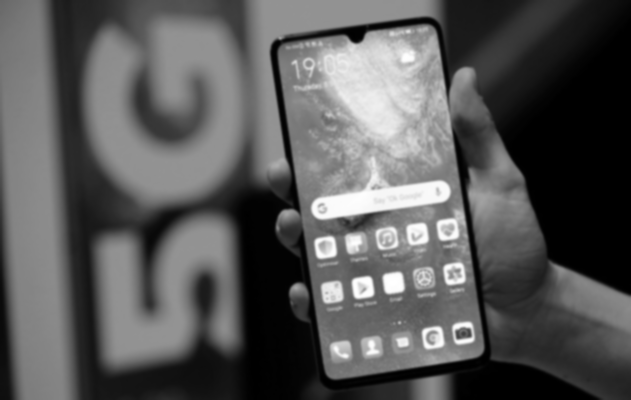

In [34]:
gray_image = cv2.GaussianBlur(src=gray_image, ksize=(5,5), sigmaX=0)
cv2_imshow(gray_image)

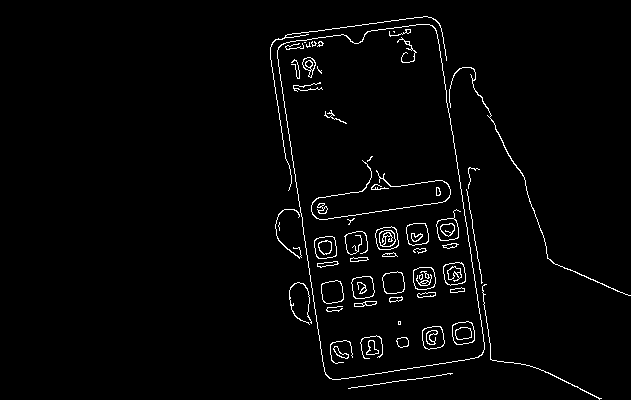

In [35]:
# Detekcja krawędzi
edges = cv2.Canny(image=gray_image, threshold1=70, threshold2=200)
cv2_imshow(edges)

In [36]:
# Detekcja konturu

contours = cv2.findContours(image=edges.copy(),
                            mode=cv2.RETR_TREE,
                            method=cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

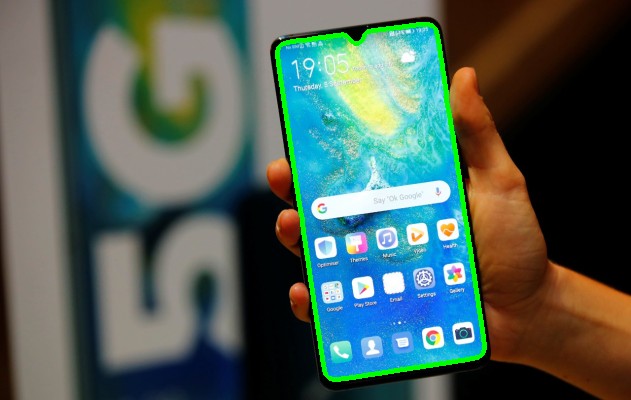

In [37]:
# Wyświetlanie wykrytych konturów

cnt1 = cv2.drawContours(image=image.copy(), contours=[contours[0]], contourIdx=-1,
                        color=(0,255,0), thickness=3)
cv2_imshow(cnt1)

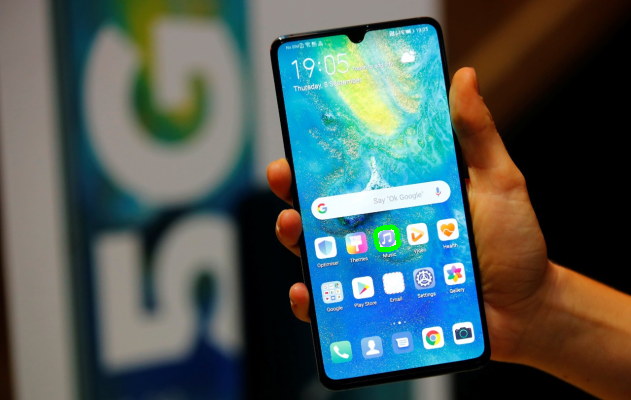

In [38]:
# Wyświetlanie wykrytych konturów

cnt1 = cv2.drawContours(image=image.copy(), contours=[contours[2]], contourIdx=-1,
                        color=(0,255,0), thickness=3)
cv2_imshow(cnt1)

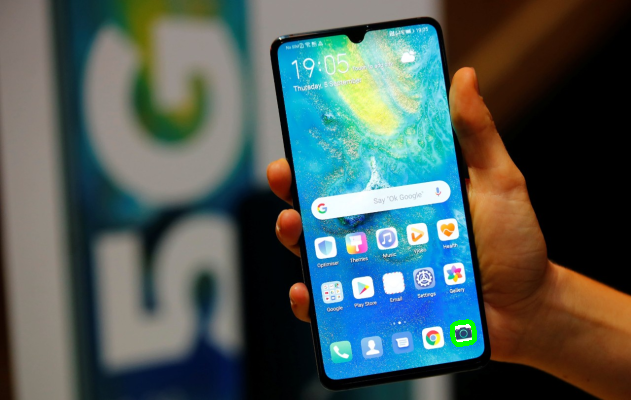

In [39]:
# Wyświetlanie wykrytych konturów

cnt1 = cv2.drawContours(image=image.copy(), contours=[contours[3]], contourIdx=-1,
                        color=(0,255,0), thickness=3)
cv2_imshow(cnt1)

In [40]:
# Detekcja prostokąta

screen_contour = None

for contour in contours:
    perimeter = cv2.arcLength(curve=contour, closed=True)
    approx = cv2.approxPolyDP(curve=contour, epsilon=0.015 * perimeter, closed=True)

    if len(approx) == 4:
        screen_contour = approx
        break

In [41]:
screen_contour

array([[[429,  24]],

       [[277,  50]],

       [[332, 379]],

       [[484, 349]]], dtype=int32)

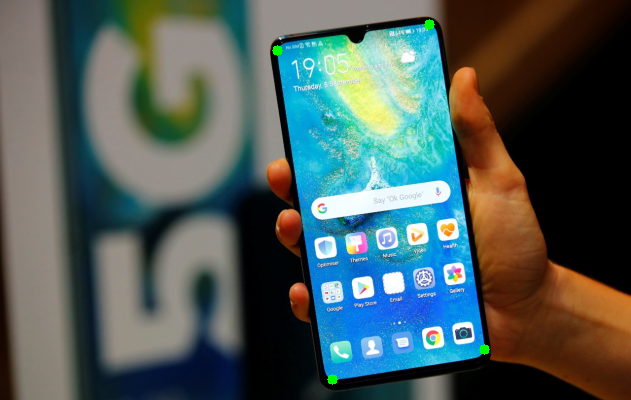

In [42]:
vertices = cv2.drawContours(image=image.copy(), contours=screen_contour, contourIdx=-1, color=(0, 255, 0), thickness=10)
cv2_imshow(vertices)

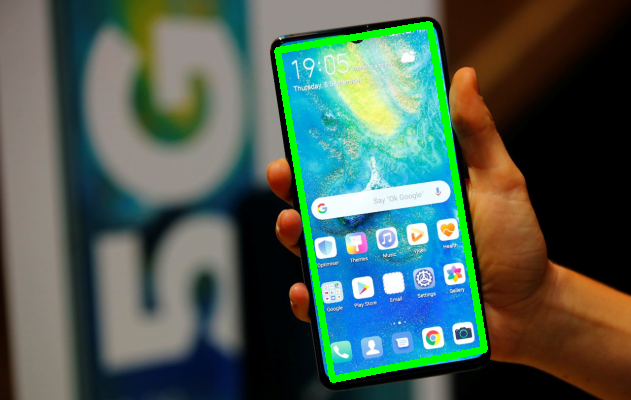

In [44]:
vertices = cv2.drawContours(image=image.copy(), contours=[screen_contour], contourIdx=-1, color=(0, 255, 0), thickness=5)
cv2_imshow(vertices)